#introduction to convoloution neural networks and computer vision with tensorslow

In [ ]:
#get the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-05-14 11:39:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.184.128, 64.233.166.128, 74.125.133.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.184.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  46.0MB/s    in 2.3s    

2022-05-14 11:39:23 (46.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
#inspect the data
!ls pizza_steak #ls is list the file in pizza steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in 'pizza_steak'.
there are 2 directories and 0 images in 'pizza_steak/test'.
there are 0 directories and 250 images in 'pizza_steak/test/pizza'.
there are 0 directories and 250 images in 'pizza_steak/test/steak'.
there are 2 directories and 0 images in 'pizza_steak/train'.
there are 0 directories and 750 images in 'pizza_steak/train/pizza'.
there are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
#another way to find out how many images in file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # creat
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #setup a target directory
  target_folder = target_dir+target_class

  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"image shape: {img.shape}")
  return img

['12718.jpg']
image shape: (384, 512, 3)


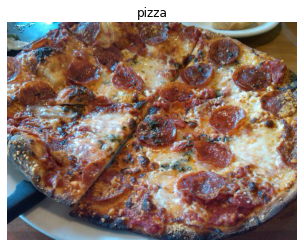

In [ ]:
#view random img
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 65, 114, 155],
        [ 53, 117, 153],
        [ 48, 124, 158],
        ...,
        [ 85,  56,  22],
        [ 80,  52,  15],
        [ 74,  46,   9]],

       [[ 74, 111, 140],
        [ 63, 114, 141],
        [ 61, 123, 148],
        ...,
        [ 87,  58,  24],
        [ 83,  55,  18],
        [ 79,  51,  14]],

       [[ 74, 106, 129],
        [ 65, 110, 131],
        [ 63, 120, 137],
        ...,
        [ 89,  60,  26],
        [ 88,  60,  23],
        [ 85,  57,  20]],

       ...,

       [[119,  88,  94],
        [118,  87,  93],
        [120,  89,  94],
        ...,
        [ 55,  39,  49],
        [ 56,  40,  51],
        [ 57,  41,  52]],

       [[117,  86,  92],
        [115,  84,  90],
        [117,  86,  92],
        ...,
        [ 56,  40,  51],
        [ 56,  40,  53],
        [ 56,  40,  53]],

       [[117,  86,  92],
        [117,  86,  92],
        [120,  89,  95],
        ...,
        [ 56,  40,  5

In [ ]:
img.shape #width height and color channels

(384, 512, 3)

In [ ]:
#get all pixels value between 0 and 1
img/255.

array([[[0.25490196, 0.44705882, 0.60784314],
        [0.20784314, 0.45882353, 0.6       ],
        [0.18823529, 0.48627451, 0.61960784],
        ...,
        [0.33333333, 0.21960784, 0.08627451],
        [0.31372549, 0.20392157, 0.05882353],
        [0.29019608, 0.18039216, 0.03529412]],

       [[0.29019608, 0.43529412, 0.54901961],
        [0.24705882, 0.44705882, 0.55294118],
        [0.23921569, 0.48235294, 0.58039216],
        ...,
        [0.34117647, 0.22745098, 0.09411765],
        [0.3254902 , 0.21568627, 0.07058824],
        [0.30980392, 0.2       , 0.05490196]],

       [[0.29019608, 0.41568627, 0.50588235],
        [0.25490196, 0.43137255, 0.51372549],
        [0.24705882, 0.47058824, 0.5372549 ],
        ...,
        [0.34901961, 0.23529412, 0.10196078],
        [0.34509804, 0.23529412, 0.09019608],
        [0.33333333, 0.22352941, 0.07843137]],

       ...,

       [[0.46666667, 0.34509804, 0.36862745],
        [0.4627451 , 0.34117647, 0.36470588],
        [0.47058824, 0

building convulation neural network
##an end to end examples
a convolutional neural network to find patterns in our images , more specifically we need way to:

load our images

preprocess our images

build a CNN to find patterns in our images

compile our CNN

fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocessed data(get all pixel valeus between 0 and 1 also called scaling/normalization )
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#set up paths to directory
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

#build a cnn model 
model_1 = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(filters=10,
                                                            kernel_size=3,
                                                            activation="relu",
                                                            input_shape=(224,224,3)),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.MaxPool2D(pool_size=2,
                                                               padding = "valid"),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.MaxPool2D(2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1,activation="sigmoid")

])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

histpry_1 = model_1.fit(train_data,
                       epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 27s 259ms/step - loss: 0.5568 - accuracy: 0.7160 - val_loss: 0.4056 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 11s 234ms/step - loss: 0.4288 - accuracy: 0.8180 - val_loss: 0.3337 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 11s 235ms/step - loss: 0.3987 - accuracy: 0.8327 - val_loss: 0.3349 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 11s 233ms/step - loss: 0.3375 - accuracy: 0.8580 - val_loss: 0.3032 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 12s 246ms/step - loss: 0.2641 - accuracy: 0.8973 - val_loss: 0.5073 - val_accuracy: 0.7640


In [ ]:
len(train_data)


47

In [ ]:
tf.random.set_seed(42)

#create a model to repricate te tensor flow model
model_2 = tf.keras.Sequential([
                                      tf.keras.layers.Flatten(input_shape=(224,224,3)),
                                      tf.keras.layers.Dense(4,activation="relu"),
                                      tf.keras.layers.Dense(4,activation="relu"),
                                      tf.keras.layers.Dense(1,activation="sigmoid")
])
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_2=model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 242ms/step - loss: 2.1690 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

model3=tf.keras.Sequential([
                                   tf.keras.layers.Flatten(input_shape=(224,224,3)),
                                   tf.keras.layers.Dense(100, activation="relu"),
                                   tf.keras.layers.Dense(100,activation="relu"),
                                   tf.keras.layers.Dense(100,activation="relu"),
                                   tf.keras.layers.Dense(1,activation="sigmoid")
])

model3.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_3= model3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 216ms/step - loss: 2.1992 - accuracy: 0.6233 - val_loss: 0.6084 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.8785 - accuracy: 0.6900 - val_loss: 0.4879 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.5688 - accuracy: 0.7533 - val_loss: 0.5743 - val_accuracy: 0.7280
Epoch 4/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4961 - accuracy: 0.7833 - val_loss: 0.5088 - val_accuracy: 0.7520
Epoch 5/5
47/47 [==============================] - 10s 212ms/step - loss: 0.4861 - accuracy: 0.7893 - val_loss: 0.5675 - val_accuracy: 0.7380


In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


###binary classification

['2018173.jpg']
image shape: (512, 512, 3)
['489347.jpg']
image shape: (512, 512, 3)


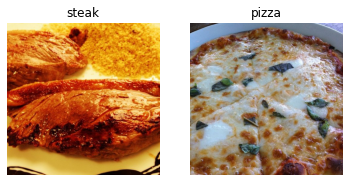

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

In [ ]:
#define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir="pizza_steak/test/"

In [ ]:
#batch is the small subset of data rather than to look at all 10000 imgs 


In [ ]:
!nvidia-smi

Sat May 14 11:42:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    61W / 149W |   1305MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
#load in images from directories to turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, #target directory of image
                                               target_size=(224,224), #target size of images (height,width)
                                               class_mode="binary", #type of data working with
                                               batch_size=32) 
#size of minibatces to load data into
                                               
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#get sample of train data batch
images,labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
#how many batchess
len(train_data), 1500/32

(47, 46.875)

In [ ]:
#get first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
#make he creating of our model a lil easy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential



In [ ]:
#creating the model our baseline with three layer convolution network
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

                           
model_4.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

                           

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4=model_4.fit(train_data, #combination if labels and sample data
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 13s 258ms/step - loss: 0.7120 - accuracy: 0.7160 - val_loss: 0.4040 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 12s 250ms/step - loss: 0.4139 - accuracy: 0.8173 - val_loss: 0.3809 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 12s 249ms/step - loss: 0.2842 - accuracy: 0.8993 - val_loss: 0.4534 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 12s 249ms/step - loss: 0.1393 - accuracy: 0.9553 - val_loss: 0.4265 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 12s 249ms/step - loss: 0.0393 - accuracy: 0.9953 - val_loss: 0.4791 - val_accuracy: 0.8080


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 163ms/step - loss: 0.5073 - accuracy: 0.7640


[0.5073442459106445, 0.7639999985694885]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

5. evaluation our model


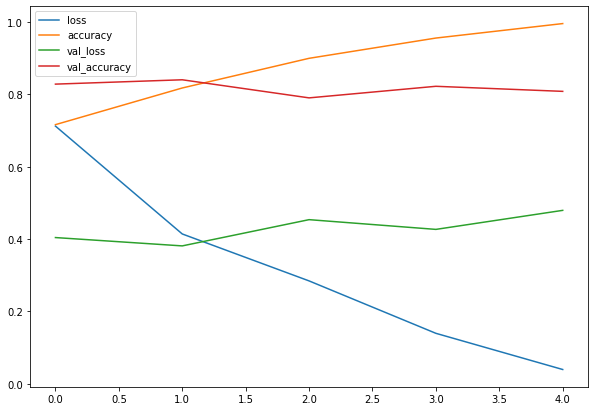

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

**note when a models validation loss starts tpo increaseits likely that the model is overfitting. this means its leaning the pattern sin the training data set too well

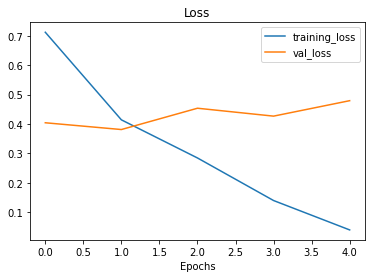

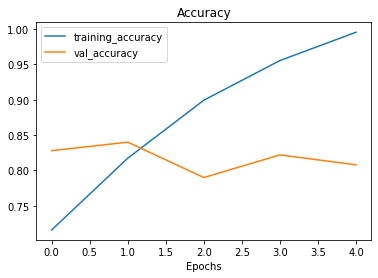

In [ ]:
plot_loss_curves(history_4)

adjusting the model parameters
fitting a machine learning model comes in 3 steps:
0. create a baseline
1. beat the baseline by overfitting a larger model
2. reduce overfitting

ways to reduce overfitting
 1.increase the number of conv layers
 2.increase nom of conv filters
 3.add a nother dense layer to te output of our flattened layer

 reduce ofadd data augmentation
 add regualaziatuon layer 
 add more data

In [ ]:
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 225ms/step - loss: 0.6017 - accuracy: 0.6860 - val_loss: 0.4931 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4624 - accuracy: 0.7887 - val_loss: 0.3811 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4272 - accuracy: 0.8073 - val_loss: 0.3704 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4180 - accuracy: 0.8187 - val_loss: 0.3397 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 10s 222ms/step - loss: 0.3745 - accuracy: 0.8407 - val_loss: 0.3240 - val_accuracy: 0.8800


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


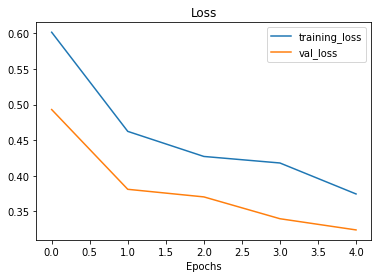

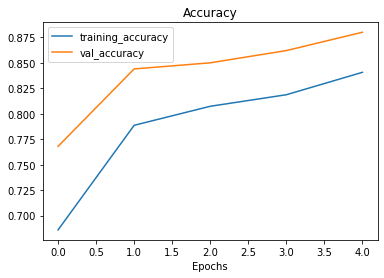

In [ ]:
plot_loss_curves(history_5)